In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from scipy.special import comb

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import os

## Dropped rows (with null):
> • Precipitation(in) (1998358)<br>• End_Lat (2246264)<br>• End_Lng (2246264)<br>• Number (1917605)<br>• Wind_Chill(F) (1852623)<br>• Airport_Code (5691)<br>• Pressure(in) (48142)<br>• Wind_Direction (45101)<br>• Timezone (3163)

---
## Dropped rows (no null):
> • ID<br>• Source (MapQuest/Bing)<br>• Country (all USA)<br>• Street (157,947 street names)<br>• Turning_Loop (because all False)

In [2]:
df = pd.read_csv('data/ca_nd.csv')
os.system("say 'you may continue working'")

0

In [3]:
df.head()

,Unnamed: 0,Severity,Distance,Side,Temperature,Humidity_pct,Visibility_mi,Windspeed_mph,Amenity,Bump,...,245.0,246.0,247.0,248.0,336.0,339.0,341.0,343.0,351.0,406.0
0,0,3,0.0,1,75.0,48.0,10.0,5.8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,0.0,1,75.0,48.0,10.0,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0.0,1,82.9,31.0,10.0,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0.0,1,75.9,48.0,10.0,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0.0,1,75.2,41.0,10.0,5.8,0,0,...,0,0,0,0,0,0,0,0,0,0


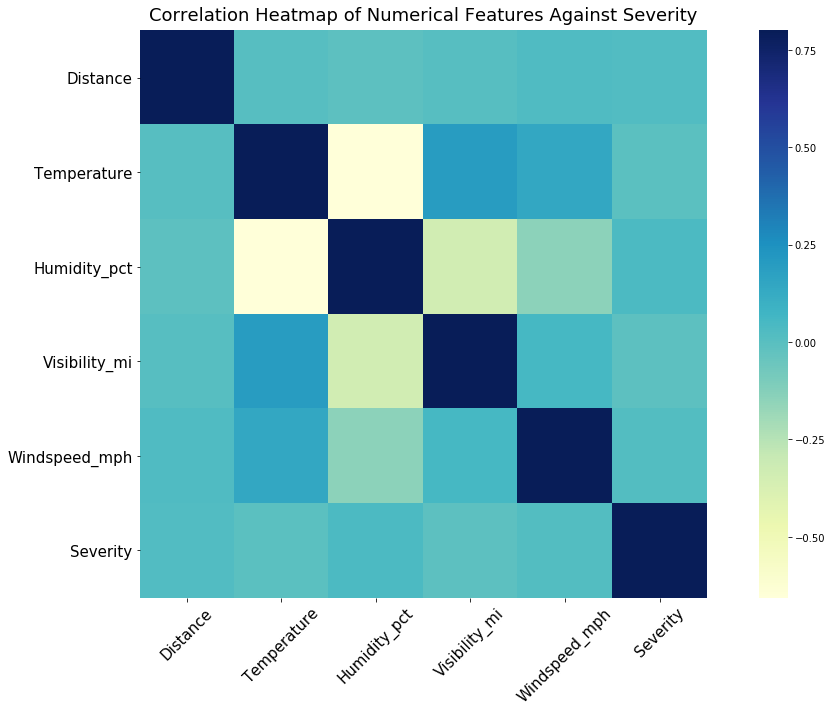

In [4]:
for_heat = df[['Distance','Temperature','Humidity_pct','Visibility_mi','Windspeed_mph', 'Severity']]
correlation_matrix = for_heat.corr()
fig = plt.figure(figsize=(15,10))

sns.heatmap(correlation_matrix, cmap='YlGnBu', vmax=0.8, square=True)
plt.title('Correlation Heatmap of Numerical Features Against Severity',
         fontsize=18,
         pad=10)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=360, fontsize=15)
plt.tight_layout()
plt.savefig('img/correlation.jpg')

# os.system("say 'you may continue working'")

In [5]:
ca_df = pd.read_csv('data/ca_with_city.csv')

In [6]:
ca_df.drop('Unnamed: 0',1,inplace=True)

In [7]:
ca_df.drop('City',1,inplace=True)

In [8]:
ca_df.head()

,Severity,Distance,Side,Temperature,Humidity_pct,Visibility_mi,Windspeed_mph,Amenity,Bump,Crossing,...,245.0,246.0,247.0,248.0,336.0,339.0,341.0,343.0,351.0,406.0
0,3,0.0,1,75.0,48.0,10.0,5.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0.0,1,75.0,48.0,10.0,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.0,1,82.9,31.0,10.0,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,1,75.9,48.0,10.0,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.0,1,75.2,41.0,10.0,5.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
<center> <h1> Linear Regression</h1></center>

---

In [9]:
# X and y via pop()
y = ca_df.pop('Severity')

In [10]:
y = np.asarray(y)

In [11]:
X = np.asarray(ca_df)

In [12]:
y

array([3, 3, 2, ..., 2, 2, 2])

In [13]:
X

array([[ 0.   ,  1.   , 75.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   , 75.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   , 82.9  , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.561,  1.   , 73.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.772,  1.   , 71.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.537,  1.   , 79.   , ...,  0.   ,  0.   ,  0.   ]])

## Preprocessing <code>StandardScaler()</code>

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [17]:
X = sm.add_constant(X)
LRE = sm.OLS(y, X)
result_lre = LRE.fit()
result_lre.summary()
os.system("say 'you may continue working'")

0

In [18]:
# With preprocessing
result_lre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     672.2
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:58:23   Log-Likelihood:            -4.3030e+05
No. Observations:              645967   AIC:                         8.608e+05
Df Residuals:                  645873   BIC:                         8.619e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3371      0.001   3701.373      0.000       2.336       2.338
x1          5.335e+09   4.82e+09      1.108      0.268    -4.1e+09    1.48e+10
x2             0.0098      0.001     15.633      0.000       0.009       0.011
x3             0.0680      0.001    112.540      0.000       0.067       0.069
x4             0.0237      0.001     29.285      0.000       0.022       0.025
x5             0.0242      0.001     27.468      0.000       0.022       0.026
x6             0.0001      0.001      0.133      0.894      -0.001       0.002
x7             0.0032      0.001      5.103      0.000       0.002       0.004
x8          2.231e-05      0.001      0.037      0.970      -0.001       0.001
x9             0.0005      0.001      0.493      0.622      -0.002       0.003
x10           -0.0102      0.001    -15.450      0.000      -0.012      -0.009
x11           -0.0011      0.001     -1.845      0.065      -0.002    6.79e-05
x12           -0.0062      0.001    -10.455      0.000      -0.007      -0.005
x13            0.0022      0.001      3.822      0.000       0.001       0.003
x14            0.0101      0.001     15.900      0.000       0.009       0.011
x15           -0.0010      0.001     -1.706      0.088      -0.002       0.000
x16           -0.0014      0.001     -2.241      0.025      -0.003      -0.000
x17           -0.0253      0.001    -42.383      0.000      -0.026      -0.024
x18           -0.0010      0.001     -0.985      0.325      -0.003       0.001
x19           -0.0393      0.001    -60.641      0.000      -0.041      -0.038
x20           -0.0059      0.001     -4.226      0.000      -0.009      -0.003
x21            0.0001      0.002      0.063      0.950      -0.003       0.004
x22           -0.0091      0.002     -5.560      0.000      -0.012      -0.006
x23           -0.0144      0.001    -11.547      0.000      -0.017      -0.012
x24            0.0324      0.001     55.070      0.000       0.031       0.034
x25         1.298e+09   1.16e+09      1.123      0.261   -9.67e+08    3.56e+09
x26         9.448e+10   8.41e+10      1.123      0.261   -7.04e+10    2.59e+11
x27         3.722e+10   3.31e+10      1.123      0.261   -2.77e+10    1.02e+11
x28         2.748e+09   2.45e+09      1.123      0.261   -2.05e+09    7.54e+09
x29         3.434e+09   3.06e+09      1.123      0.261   -2.56e+09    9.42e+09
x30          7.07e+10   6.29e+10      1.123      0.261   -5.26e+10    1.94e+11
x31         8.436e+09   7.51e+09      1.123      0.261   -6.28e+09    2.32e+10
x32         1.535e+10   1.37e+10      1.123      0.261   -1.14e+10    4.21e+10
x33         6.818e+08   6.07e+08      1.123      0.261   -5.08e+08    1.87e+09
x34         3.486e+10    3.1e+10      1.123      0.261    -2.6e+10    9.57e+10
x35         1.205e+09   1.07e+09      1.123      0.261   -8.97e+08    3.31e+09
x3

## Without preprocessing (OLS)

In [30]:
new_df = pd.read_csv('data/ca_with_city.csv')
new_df.drop('Unnamed: 0',1,inplace=True)
new_df.drop('City',1,inplace=True)
os.system("say 'you may continue working'")

0

In [31]:
new_df.head()

,Severity,Distance,Side,Temperature,Humidity_pct,Visibility_mi,Windspeed_mph,Amenity,Bump,Crossing,...,245.0,246.0,247.0,248.0,336.0,339.0,341.0,343.0,351.0,406.0
0,3,0.0,1,75.0,48.0,10.0,5.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0.0,1,75.0,48.0,10.0,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.0,1,82.9,31.0,10.0,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,1,75.9,48.0,10.0,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.0,1,75.2,41.0,10.0,5.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y1 = new_df.pop('Severity')

In [33]:
y1 = np.asarray(y1)

In [34]:
X1 = np.asarray(new_df)

In [35]:
# Without preprocessing
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     681.5
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:07:38   Log-Likelihood:            -4.2991e+05
No. Observations:              645967   AIC:                         8.600e+05
Df Residuals:                  645873   BIC:                         8.611e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9582      0.028     70.404      0.000       1.904       2.013
x1             0.0150      0.001     16.428      0.000       0.013       0.017
x2             0.2226      0.002    113.237      0.000       0.219       0.226
x3             0.0019    6.5e-05     29.323      0.000       0.002       0.002
x4             0.0010   3.69e-05     27.644      0.000       0.001       0.001
x5             0.0001      0.000      0.335      0.738      -0.001       0.001
x6             0.0005      0.000      4.976      0.000       0.000       0.001
x7             0.0005      0.007      0.067      0.947      -0.014       0.015
x8             0.0338      0.081      0.419      0.676      -0.125       0.192
x9            -0.0616      0.004    -15.429      0.000      -0.069      -0.054
x10           -0.0408      0.022     -1.827      0.068      -0.085       0.003
x11           -0.0182      0.002    -10.437      0.000      -0.022      -0.015
x12            0.1139      0.030      3.817      0.000       0.055       0.172
x13            0.0986      0.006     15.975      0.000       0.086       0.111
x14           -0.1890      0.111     -1.703      0.089      -0.407       0.029
x15           -0.0103      0.005     -2.252      0.024      -0.019      -0.001
x16           -0.2006      0.005    -42.433      0.000      -0.210      -0.191
x17           -0.0737      0.067     -1.106      0.269      -0.204       0.057
x18           -0.1486      0.002    -60.679      0.000      -0.153      -0.144
x19           -0.0124      0.003     -4.170      0.000      -0.018      -0.007
x20            0.0004      0.004      0.098      0.922      -0.007       0.008
x21           -0.0218      0.004     -5.583      0.000      -0.029      -0.014
x22           -0.0370      0.003    -11.549      0.000      -0.043      -0.031
x23            0.0179      0.000     55.133      0.000       0.017       0.019
x24           -0.0873      0.087     -1.006      0.314      -0.257       0.083
x25            0.1330      0.013     10.068      0.000       0.107       0.159
x26           -0.0242      0.013     -1.795      0.073      -0.051       0.002
x27           -0.0833      0.043     -1.956      0.050      -0.167       0.000
x28            0.2420      0.035      6.924      0.000       0.173       0.310
x29           -0.0664      0.013     -5.001      0.000      -0.092      -0.040
x30           -0.0684      0.019     -3.663      0.000      -0.105      -0.032
x31           -0.0536      0.015     -3.556      0.000      -0.083      -0.024
x32           -0.1978      0.164     -1.208      0.227      -0.519       0.123
x33            0.1271      0.013      9.424      0.000       0.101       0.154
x34           -0.1963      0.093     -2.105      0.035      -0.379      -0.013
x35            0.3828      0.083      4.631      0.000       0.221       0.545
x3

In [39]:
df_random = pd.read_csv('data/3-accidents-dummies-next.csv')

In [41]:
df_random.columns

Index(['Unnamed: 0', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Weather_Timestamp', 'Temperature', 'Humidity_pct', 'Visibility_mi',
       'Windspeed_mph', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

---
<center> <h1> Random Forest Regression</h1></center>

---

In [99]:
forest = pd.read_csv('data/ca_with_city.csv')
forest.drop('Unnamed: 0',1,inplace=True)
forest.drop('City',1,inplace=True)

In [100]:
forest.head()

,Severity,Distance,Side,Temperature,Humidity_pct,Visibility_mi,Windspeed_mph,Amenity,Bump,Crossing,...,245.0,246.0,247.0,248.0,336.0,339.0,341.0,343.0,351.0,406.0
0,3,0.0,1,75.0,48.0,10.0,5.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0.0,1,75.0,48.0,10.0,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.0,1,82.9,31.0,10.0,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,1,75.9,48.0,10.0,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.0,1,75.2,41.0,10.0,5.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

In [101]:
y_for = forest.pop('Severity')

In [102]:
X_for = np.asarray(forest)

In [103]:
y_for = np.asarray(y_for)

In [104]:
X_for = preprocessing.StandardScaler().fit(X_for).transform(X_for)

## Train, test, split

In [105]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_for, y_for, test_size=0.3, random_state=4)

In [113]:
reg_rf = RandomForestRegressor(n_estimators=100,
                              max_depth=30,
                              random_state=2)

In [115]:
reg_rf.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [116]:
y_rf = reg_rf.predict(X2_test)

## Random Forest R^2 = 0.18487161528085205

In [117]:
reg_rf.score(X2_test, y2_test)

0.18487161528085205

## Grid Search

In [132]:
np.linspace(1,32,1, endpoint=True)

array([1.])

In [138]:
parameters = [{'n_estimators': [10, 20, 30],
              'max_depth': [10, 15, 30]}]

RF = RandomForestRegressor()

In [139]:
grid_rf = GridSearchCV(RF, parameters)

In [140]:
grid_rf

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [10, 15, 30]

In [141]:
y_for.shape

(645967,)

In [142]:
grid_rf.fit(X_for,y_for)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [10, 15, 30]

In [ ]:
os.system("say 'you may continue working'")